<a href="https://colab.research.google.com/github/ganeshghadge2772/Text-Clustering/blob/main/Text_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from sklearn.datasets import fetch_20newsgroups

In [ ]:
dataset = fetch_20newsgroups(download_if_missing=True)

In [ ]:
df = pd.DataFrame(list(dataset.data), columns=['Text'])
df

,Text
0,From: lerxst@wam.umd.edu (where's my thing)\nS...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...
...,...
11309,From: jim.zisfein@factory.com (Jim Zisfein) \n...
11310,From: ebodin@pearl.tufts.edu\nSubject: Screen ...
11311,From: westes@netcom.com (Will Estes)\nSubject:...
11312,From: steve@hcrlgw (Steven Collins)\nSubject: ...


In [ ]:
# downloading the stopwords

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# importing the stopwords

import string
from nltk.corpus import stopwords

In [ ]:
# creating a list of stopwords

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# create a function to remove the stopwords and punctuations

def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
# creating a column with the cleaned message

df['tokenized_message'] = df['Text'].apply(text_process)

In [ ]:
df.head(5)

,Text,tokenized_message
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,lerxstwamumdedu wheres thing Subject car NntpP...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,guykuocarsonuwashingtonedu Guy Kuo Subject SI ...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,twillisececnpurdueedu Thomas E Willis Subject ...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,jgreenamber Joe Green Subject Weitek P9000 Org...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,jcmheadcfaharvardedu Jonathan McDowell Subject...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#vectorize

vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)

In [ ]:
X = vectorizer.fit_transform(df['tokenized_message'])

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
#clustering
km = KMeans(n_clusters=5, random_state= 42)

km.fit(X)

KMeans(n_clusters=5, random_state=42)

In [ ]:
# store cluster labels in a variable
clusters = km.labels_

In [ ]:
df['labels'] = clusters

In [ ]:
df

,Text,tokenized_message,labels
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,lerxstwamumdedu wheres thing Subject car NntpP...,3
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,guykuocarsonuwashingtonedu Guy Kuo Subject SI ...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,twillisececnpurdueedu Thomas E Willis Subject ...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,jgreenamber Joe Green Subject Weitek P9000 Org...,3
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,jcmheadcfaharvardedu Jonathan McDowell Subject...,3
...,...,...,...
11309,From: jim.zisfein@factory.com (Jim Zisfein) \n...,jimzisfeinfactorycom Jim Zisfein Subject Migra...,3
11310,From: ebodin@pearl.tufts.edu\nSubject: Screen ...,ebodinpearltuftsedu Subject Screen Death Mac P...,4
11311,From: westes@netcom.com (Will Estes)\nSubject:...,westesnetcomcom Estes Subject Mounting CPU Coo...,3
11312,From: steve@hcrlgw (Steven Collins)\nSubject: ...,stevehcrlgw Steven Collins Subject Sphere 4 po...,3


In [ ]:
#Performance

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

Silhouette Coefficient: 0.002


In [ ]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [ ]:
# assign clusters and pca vectors to our dataframe 
df['cluster'] = clusters
df['x0'] = x0
df['x1'] = x1

In [ ]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)


Cluster 0
say,us,article,think,writes,dont,one,god,would,people

Cluster 1
escrow,government,gebcspittedu,keys,gordon,banks,key,chip,encryption,clipper

Cluster 2
writes,play,season,year,baseball,hockey,games,players,team,game

Cluster 3
usa,new,like,one,would,distribution,article,writes,university,nntppostinghost

Cluster 4
anyone,help,nntppostinghost,please,use,card,email,university,thanks,windows


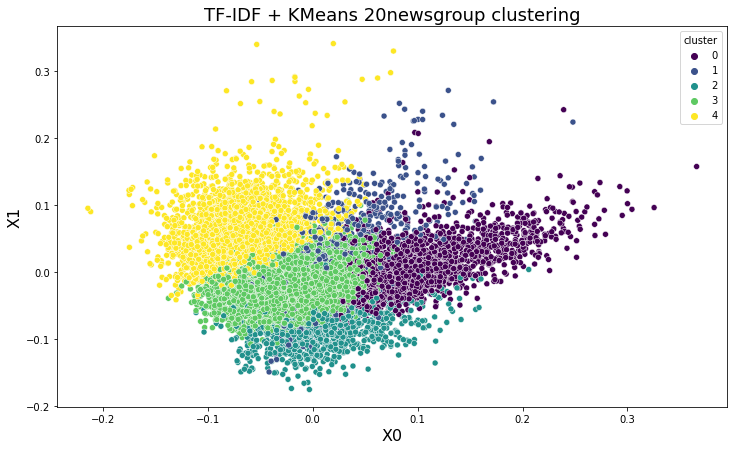

In [ ]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans 20newsgroup clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()